<a href="https://colab.research.google.com/github/dayvvid/gsb521_w23_final_project/blob/main/Yelp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID Impact of Restaurant Ratings




##By David Ma and Evan Roth



##**Introduction**

This notebook examines the impact on the restaurant's Yelp rating over COVID/pandamic period. Yelp reviews data from 2019 to 2022 is being used to conduct this analysis.

##**Hypothesis**

Restaurant will have impact on Yelp star ratings due to COVID lockdowns. We think most restaurant will receive decrease in ratings after COVID. With this analysis, we want to look at how average ratings change on the same restaurant.

##About

We gather Yelp data from Yelp directly:
https://www.yelp.com/dataset

Each file is composed of a single object type, one JSON-object per-line. Where "business.json" Contains business data including location data, attributes, and categories. "review.json" Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

##Json file cleaning process

In [ ]:
# code chunk
import json
from collections import defaultdict
import numpy as np
import pandas as pd

b_pandas = []
r_dtypes = {"stars": np.float16,
            "useful": np.int32,
            "funny": np.int32,
            "cool": np.int32,
            }
with open("/Users/evanroth/Desktop/yelp_dataset/yelp_academic_dataset_review.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True,
                          dtype=r_dtypes, chunksize=1000)

    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id', 'text', 'useful','funny','cool'])
        b_pandas.append(reduced_chunk)

b_pandas = pd.concat(b_pandas, ignore_index=True)

# Group the rows by year and business_id, and calculate the average rating for each group
df_grouped = b_pandas.groupby([b_pandas['date'].dt.year, 'business_id']).mean().reset_index()

# Rename the columns to be more descriptive
df_grouped = df_grouped.rename(columns={'date': 'year'})

# Select only the rows where the year is 2019 or 2022
df_selected = df_grouped[df_grouped['year'].isin([2019, 2022])]

df_selected.to_csv("reviews.csv")
#print(df_selected)


    
    // string, 22 character unique string business id
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // string, the business's name
    "name": "Garaje",

    // string, the full address of the business
    "address": "475 3rd St",

    // string, the city
    "city": "San Francisco",

    // string, 2 character state code, if applicable
    "state": "CA",

    // string, the postal code
    "postal code": "94107",

    // float, latitude
    "latitude": 37.7817529521,

    // float, longitude
    "longitude": -122.39612197,

    // float, star rating, rounded to half-stars
    "stars": 4.5,

    // integer, number of reviews
    "review_count": 1198,

    // integer, 0 or 1 for closed or open, respectively
    "is_open": 1,

    // object, business attributes to values. note: some attribute values might be objects
    "attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
    },

##Yelp Reviews and Restaurant Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# load the average star rating data
reviews_df = pd.read_csv("reviews.csv")
restaurants_df = pd.read_csv("restaurants.csv")

In [5]:
pd.options.display.float_format = "{:,.2f}".format
# drop the first column
reviews_df = reviews_df[["year", "business_id", "stars"]]
# drop the first column
restaurants_df = restaurants_df.drop(restaurants_df.columns[0], axis =1)

In [6]:
# filter US by 5 digits postal codes
restaurants_df = restaurants_df[restaurants_df['postal_code'].str.len() == 5]

In [7]:
restaurants_df.head(10)

,business_id,name,city,state,postal_code,stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,4.00,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,37015,2.00,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,63123,3.00,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr..."
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,37207,1.50,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602,4.00,10,1,"Vietnamese, Food, Restaurants, Food Trucks"
5,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,46227,2.50,28,1,"American (Traditional), Restaurants, Diners, B..."
6,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,FL,33771,4.50,100,0,"Food, Delis, Italian, Bakeries, Restaurants"
7,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.00,245,1,"Sushi Bars, Restaurants, Japanese"
8,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.50,205,1,"Korean, Restaurants"
10,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,Indianapolis,IN,46250,4.00,20,1,"Steakhouses, Asian Fusion, Restaurants"


##Merge the Data

In [8]:
# merge by business_id
df = pd.merge(reviews_df, restaurants_df, on = "business_id")

In [9]:
# print df
df.head()

,year,business_id,stars_x,name,city,state,postal_code,stars_y,review_count,is_open,categories
0,2019,--8IbOsAAxjKRoYsBFL-PA,5.00,The Original Italian Pie,Gentilly,LA,70122,3.00,27,0,"Food, Restaurants, Italian"
1,2019,--epgcb7xHGuJ-4PUeSLAw,1.80,Manhattan Bagel,Willow Grove,PA,19090,3.00,34,1,"Restaurants, Food, Bagels, Sandwiches, Breakfa..."
2,2019,--lqIzK-ZVTtgwiQM63XgQ,2.00,Wendy's,Indianapolis,IN,46250,2.00,15,1,"Burgers, Fast Food, Restaurants"
3,2019,--qLiYw2ErSmvVwumb2kdw,5.00,C.C.'s Kitchen,Haddon Heights,NJ,08035,5.00,5,0,"Food, Restaurants, Soup, Desserts, American (N..."
4,2019,-09Oc2D14vRnmirPh0vlXw,2.86,Cracker Barrel Old Country Store,Mount Holly,NJ,08060,3.00,135,1,"Diners, Shopping, Caterers, Restaurants, Comfo..."


In [10]:
# group the rows by business_id and keep only the groups with more than 1 row
df_filtered = df.groupby('business_id').filter(lambda x: len(x) > 1)

In [11]:
df_filtered.head()

#df_filtered.to_csv("merged.csv")

,year,business_id,stars_x,name,city,state,postal_code,stars_y,review_count,is_open,categories
4,2019,-09Oc2D14vRnmirPh0vlXw,2.86,Cracker Barrel Old Country Store,Mount Holly,NJ,08060,3.00,135,1,"Diners, Shopping, Caterers, Restaurants, Comfo..."
5,2022,-09Oc2D14vRnmirPh0vlXw,1.00,Cracker Barrel Old Country Store,Mount Holly,NJ,08060,3.00,135,1,"Diners, Shopping, Caterers, Restaurants, Comfo..."
6,2019,-0EdehHjIQc0DtYU8QcAig,4.20,New Tung Tung Two Restaurant,Land O Lakes,FL,34638,3.00,35,1,"Restaurants, Chinese"
7,2022,-0EdehHjIQc0DtYU8QcAig,5.00,New Tung Tung Two Restaurant,Land O Lakes,FL,34638,3.00,35,1,"Restaurants, Chinese"
9,2019,-0TffRSXXIlBYVbb5AwfTg,4.55,IndeBlue Modern Indian Food & Spirits,Philadelphia,PA,19107,4.50,1097,1,"Cocktail Bars, Food Delivery Services, Nightli..."


##Data Stats

In [12]:
pivot_df = df_filtered.pivot(index='business_id', columns='year', values='stars_x')

In [13]:
pivot_df.head()

year,2019,2022
business_id,,
-09Oc2D14vRnmirPh0vlXw,2.86,1.00
-0EdehHjIQc0DtYU8QcAig,4.20,5.00
-0TffRSXXIlBYVbb5AwfTg,4.55,4.14
-0iIxySkp97WNlwK66OGWg,3.50,2.33
-0jK77zdE3-plqXuwXtilQ,3.69,5.00


In [14]:
# create a coulmn that track the average stars difference
pivot_df['diff_stars'] = pivot_df.apply(lambda row: row[2022] - row[2019], axis=1)

In [15]:
#pivot_df.head()

print(pivot_df)


year                    2019  2022  diff_stars
business_id                                   
-09Oc2D14vRnmirPh0vlXw  2.86  1.00       -1.86
-0EdehHjIQc0DtYU8QcAig  4.20  5.00        0.80
-0TffRSXXIlBYVbb5AwfTg  4.55  4.14       -0.41
-0iIxySkp97WNlwK66OGWg  3.50  2.33       -1.17
-0jK77zdE3-plqXuwXtilQ  3.69  5.00        1.31
...                      ...   ...         ...
zyPz0xvE5XkeCVH2J7g2gw  3.63  3.50       -0.13
zymvTQ12tRy3bzmP4tPgOg  4.29  2.33       -1.96
zzIF9qp2UoHN48EeZH_IDg  1.80  4.00        2.20
zzbZtgPYZS8sTIWQH6DwEw  2.00  1.00       -1.00
zzjFdJwXuxBOGe9JeY_EMw  4.40  5.00        0.60

[8749 rows x 3 columns]


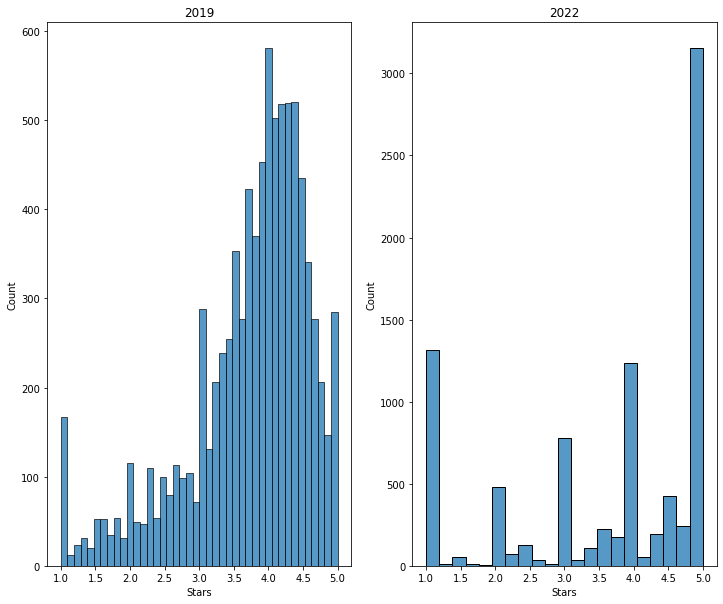

In [16]:
df = pivot_df
# Create two histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(12,10))

sns.histplot(data=df, x=2019, kde=False, ax=axs[0])
axs[0].set_title('2019')
axs[0].set_xlabel('Stars')
axs[0].set_ylabel('Count')

sns.histplot(data=df, x=2022, kde=False, ax=axs[1])
axs[1].set_title('2022')
axs[1].set_xlabel('Stars')
axs[1].set_ylabel('Count')

plt.show()
#print(df.columns)

###Stats

In [17]:
# Bin the star ratings into 5 bins with range 1-5, separated by 1
bins = [0,1,2,3,4,5]
labels = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
df['2019_bins'] = pd.cut(df[2019], bins=bins, labels=labels)
df['2022_bins'] = pd.cut(df[2022], bins=bins, labels=labels)

df = df.reset_index()


print(df)

year             business_id  2019  2022  diff_stars 2019_bins 2022_bins
0     -09Oc2D14vRnmirPh0vlXw  2.86  1.00       -1.86   3 stars    1 star
1     -0EdehHjIQc0DtYU8QcAig  4.20  5.00        0.80   5 stars   5 stars
2     -0TffRSXXIlBYVbb5AwfTg  4.55  4.14       -0.41   5 stars   5 stars
3     -0iIxySkp97WNlwK66OGWg  3.50  2.33       -1.17   4 stars   3 stars
4     -0jK77zdE3-plqXuwXtilQ  3.69  5.00        1.31   4 stars   5 stars
...                      ...   ...   ...         ...       ...       ...
8744  zyPz0xvE5XkeCVH2J7g2gw  3.63  3.50       -0.13   4 stars   4 stars
8745  zymvTQ12tRy3bzmP4tPgOg  4.29  2.33       -1.96   5 stars   3 stars
8746  zzIF9qp2UoHN48EeZH_IDg  1.80  4.00        2.20   2 stars   4 stars
8747  zzbZtgPYZS8sTIWQH6DwEw  2.00  1.00       -1.00   2 stars    1 star
8748  zzjFdJwXuxBOGe9JeY_EMw  4.40  5.00        0.60   5 stars   5 stars

[8749 rows x 6 columns]


In [19]:
# create pivot table
df[[2019,2022]].describe()


year,2019,2022
count,"8,749.00","8,749.00"
mean,3.73,3.67
std,0.88,1.44
min,1.00,1.00
25%,3.33,3.00
50%,3.94,4.00
75%,4.33,5.00
max,5.00,5.00


In [20]:
# summary on star diff
df[["diff_stars"]].describe()

year,diff_stars
count,"8,749.00"
mean,-0.06
std,1.33
min,-4.00
25%,-0.83
50%,0.12
75%,0.80
max,4.00


In [31]:
# group by
stars_2019 = df.groupby("2019_bins")["2019_bins"].count()
stars_2019

2019_bins
1 star      164
2 stars     427
3 stars    1037
4 stars    3244
5 stars    3877
Name: 2019_bins, dtype: int64

In [32]:
# group by
stars_2022 = df.groupby("2022_bins")["2022_bins"].count()
stars_2022

2022_bins
1 star     1313
2 stars     560
3 stars    1025
4 stars    1778
5 stars    4073
Name: 2022_bins, dtype: int64

###Histogram of difference in star ratings comparing between 2019 to 2022

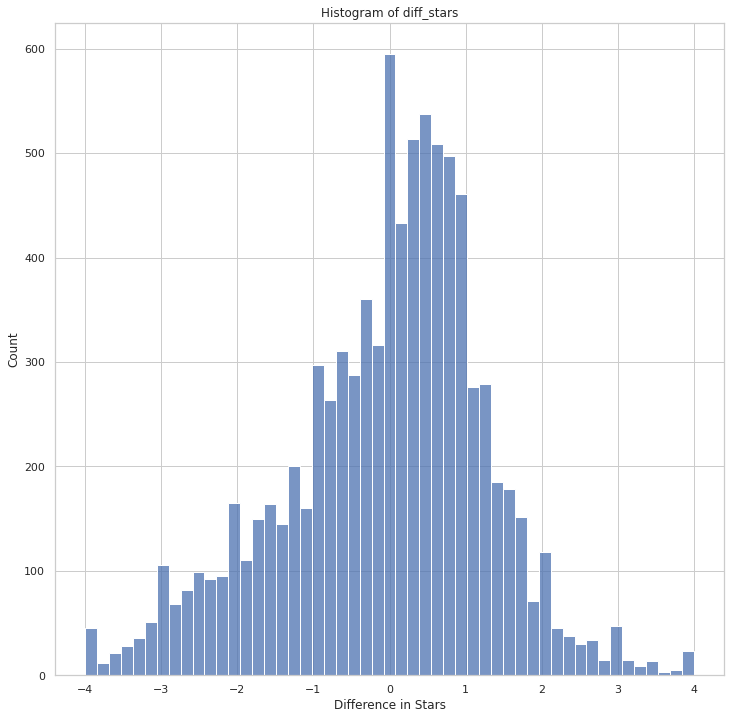

In [ ]:
# Create a histogram for diff_stars
fig, ax = plt.subplots(figsize=(12, 12))
sns.histplot(data=df, x='diff_stars', kde=False)
plt.title('Histogram of diff_stars')
plt.xlabel('Difference in Stars')
plt.ylabel('Count')
plt.show()

##Visual Analysis

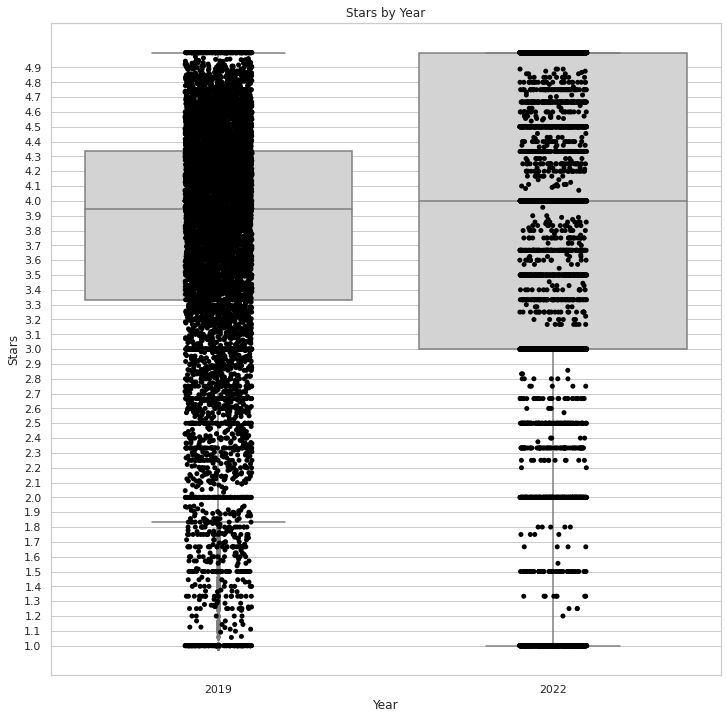

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# create the box plot using seaborn
sns.set(style='whitegrid')
ax = sns.boxplot(x='year', y='stars_x', data=df_filtered, color="lightgray")

# Add jitter plot with seaborn
sns.stripplot(x='year', y='stars_x', data=df_filtered, color='black', jitter=True, ax=ax)

# set the plot title and axis labels
ax.set_title('Stars by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Stars')

# set y-axis ticks to 0.1 separation
y_ticks = [x / 10 for x in range(10,50)]

ax.set(yticks=y_ticks)

# show the plot
plt.show()